# Analyse de stabilité - Stability analysis   
L'objectif de cet exercice est d'expliciter le concept d'instabilité et de vibrations auto-excitées. Par exemple, considérons le système masse-ressort de la figure ci-dessous. Le corps est libre de se déplacer dans la direction transverse à l'écoulement. Il a une section transversale uniforme avec une masse totale de $M = m_s l$, où $m_s$ est la masse par unité de longueur. Le corps est sujet à une force dynamique exercée par le fluide $F_f (y,\dot y,\ddot y)$ et une force mécanique extérieure $F_m (t)$. Nous avons donc :

The aim of this exercise is to clarify the concept of instability and self-excited vibrations. For example, consider the spring mass system shown in the figure below. The Bluff body is free to move in transverse direction to the flow. The body has a uniform cross section area with a total mass $M = m_s l$, where $m_s$ is the mass per unit length. The body is subjected to a fluid-dynamical force $F_f (y,\dot y,\ddot y)$ and an external mechanical force $F_m (t)$. Thus we have:
### $m_s l \ddot y + c \dot y + ky = F_f (y,\dot y,\ddot y)+ F_m (t) $


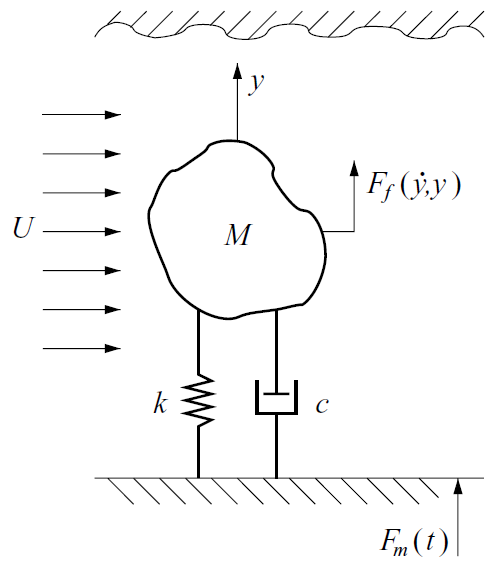

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/lm2-poly/FSI/main/Chapitre-2_Analyse-dimensionnelle/2_Analyse_stabilite/Stabilite.PNG')

##### ( Schéma du corps oscillant - Oscillating body diagram. Païdoussis et al. [2010].)

Assumons que $l>>D$, où $D$ est le diamètre du corps, de telle sorte que le problème puisse être considéré en $2D$. Supposons également que $F_f = \frac{1}{2} \rho U^2 Dl C_{f1}(\dot y,U)+ \frac{1}{2}\rho U^2 Dl C_{f2}(y,U)$, où $C_{f1},C_{f2}$ sont les coefficients de la force exercée par le fluide, et que la masse totale par unité de longueur $m = m_s +m_f$, où $m_f = \rho \frac{\pi}{4}D^2$.  

Assume $l>>D$, where $D$ is the diameter of the bluff body so that the problem can be considered as $2D$. Also, assume $F_f = \frac{1}{2} \rho U^2 Dl C_{f1}(\dot y,U)+ \frac{1}{2}\rho U^2 Dl C_{f2}(y,U)$, where $C_{f1},C_{f2}$ are fluid force coefficients, and that the total mass per unit length $m = m_s +m_f$, where $m_f = \rho \frac{\pi}{4}D^2$.  
  
$\implies$
### $ml \ddot y + c \dot y + ky = \frac{1}{2} \rho U^2 Dl( C_{f1}(\dot y,U)+ C_{f2}(y,U))+ F_m (t) $  
## Nombres adimensionnels - Dimensionless quantities
###  $\eta = \frac{y}{D}$, $\tau = t w_n $, $w_n = \sqrt{\frac{k}{ml}}$, $\zeta = \frac{1}{2}\frac{c}{\sqrt{kml}}$, $U_R = \frac{U}{w_n D}$, $M = \frac{\rho D^2}{m}$, and let $\dot \eta = \frac{\partial \eta}{\partial \tau} $  
$\implies$ L'équation adimensionnelle dans l'écoulement - The non-dimensional equation in flow:  
### $\ddot \eta + 2\zeta \dot \eta + \eta = \frac{1}{2}MU_R^2(C_{f1}(\dot \eta , U_R)+C_{f2}(\eta,U_R)) $,  
où $F_m(t)$ est ignorée car elle n'est pas affectée par le mouvement - where $F_m(t)$ is ignored because it is not affected by the motion.  
Pour l'analyse dimensionnelle, soit - For stability analysis, let:
### $\frac{1}{2}MU_R^2(C_{f1}(\dot \eta , U_R) = \beta \dot \eta $,   $C_{f2}(\eta,U_R) = 0$  
$\implies$
### $\ddot \eta + (2 \zeta - \beta) \dot \eta + \eta = 0$  
Soit la solution de la forme - Let the solution be of the form: $\eta(\tau) = \hat \eta e^{iw\tau}$  

$\implies$  
### $(-w^2+(2 \zeta - \beta)iw+1)\hat \eta e^{iw\tau}=0$  

La solution pour les fréquences naturelles est - The solution for natural frequencies is:
### $w_{1,2}=\frac{(\beta - 2 \zeta)i \mp \sqrt{-(2 \zeta - \beta)+4}}{-2}$  
En résolvant l'équation quadratique, on peut aisément obtenir les fréquences naturelles du système. Une démonstration est donnée dans le code ci-dessous.

By solving the quadratic equation, one can easily get the natural frequencies of the system. A demonstration is given in the following code.

### ** Pour plus de détails, veuillez consulter les notes de cours sur Moodle.  Vous pouvez trouver les vidéos des cours dans le lien Youtube ci-dessous. For more details please advise the course notes on Moodle. You can find the lectures videos in the following Youtube link.
https://www.youtube.com/playlist?list=PLELkG-6HgaYgb6zMBw3LPdeUCHDjb4APi


In [2]:
# =============================================================================
# Définition des librairies - Define libraries
# =============================================================================

import numpy as np 
import matplotlib.pyplot as plt
import cmath                     # Librairie pour les maths complexes - Complex math library

In [3]:
# =============================================================================
# Définition de beta et zeta - Define beta and zeta
# =============================================================================
beta = np.arange(start=0, stop=4, step=0.01)
zeta = 0.5
sr_real = np.zeros((len(beta),2))             # sr_real pour valeurs réelles - for real values
sr_im = np.zeros((len(beta),2))               # sr_im pour valeurs complexes - for complex values

In [4]:
# =============================================================================
# Définition des coefficients de l'équation caractéristique - Define the characteristic equation coefficients
# =============================================================================
a = -1.
b = (2.*zeta-beta)*1j
c = 1.
d = b**2 - 4*a*c                               # Calcul du discriminant - Calculate the discriminant

In [5]:
# =============================================================================
# Calcul des fréquences naturelles pour chaque valeur de beta pour une valeur donnée de zeta
# Solving for the natural frequencies for each beta value for a given zeta
# =============================================================================
for z in range (len(beta)):                     # Deux solutions pour chaque beta - Find two solutions for each beta
    
    s1 = (-b-cmath.sqrt(d[z]))/(2*a)
    s2 = (-b+cmath.sqrt(d[z]))/(2*a)

    sr_real[z,0] = s1.real[z]                   # Tri - Sorting  
    sr_real[z,1] = s2.real[z] 
    sr_im[z,0] = s1.imag[z]                     
    sr_im[z,1] = s2.imag[z]

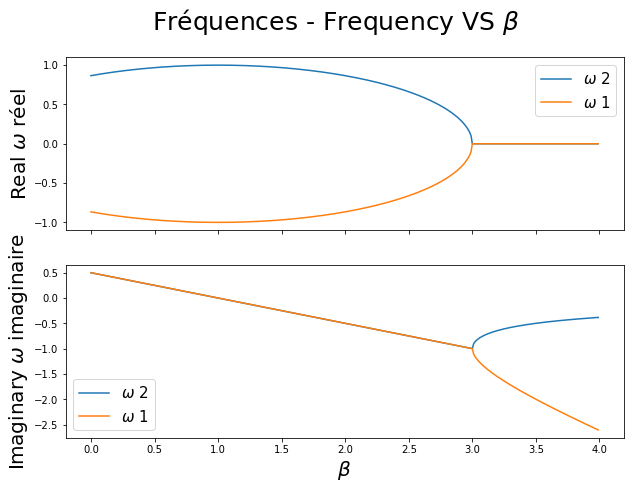

In [6]:
# =============================================================================
# Tracé - Plotting
# =============================================================================
plt.rcParams['figure.figsize'] = [10, 7]
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(r'Fréquences - Frequency VS $\beta$',fontsize = 25.0)
ax1.plot(beta,sr_real[:,0],beta,sr_real[:,1])
ax2.plot(beta,sr_im[:,0],beta,sr_im[:,1])
plt.xlabel(r'$\beta$',fontsize = 20.0)
ax1.set_ylabel('Real'' ''$\omega$ réel',fontsize = 20.0)
ax2.set_ylabel('Imaginary'' ''$\omega$ imaginaire',fontsize = 20.0)
ax1.legend([r"$\omega$ 2",'$\omega$ 1'],fontsize = 15.0)
ax2.legend([r"$\omega$ 2",'$\omega$ 1'],fontsize = 15.0)
plt.show()